In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
!pwd

/content


In [7]:
!ls

drive  sample_data


In [8]:
!ls drive/

MyDrive  Shareddrives


In [32]:
# !ls drive/MyDrive/

In [10]:
df=pd.read_csv("/content/drive/MyDrive/customer_acquisition_data.csv")
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [12]:
df.shape


(800, 5)

In [13]:
df.isnull().sum()


customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [15]:
df.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


distribution of Acquisition cost and Revenue in the data:

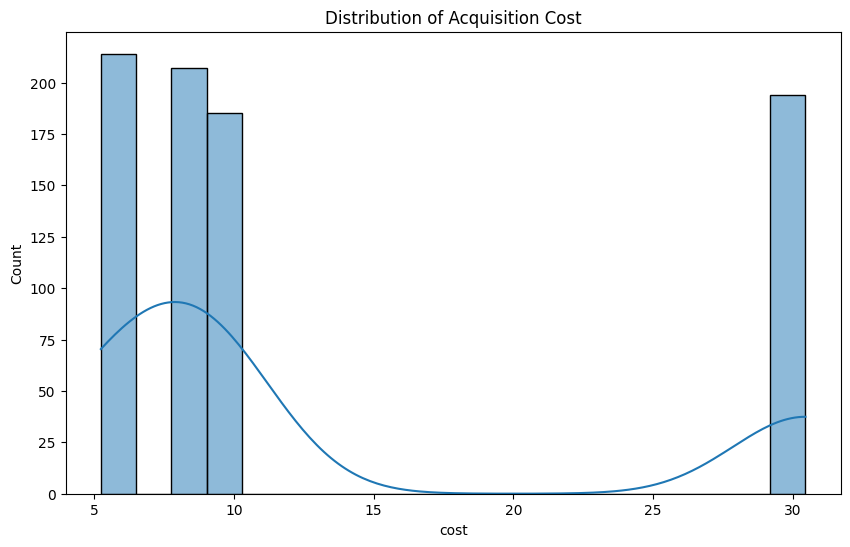

In [16]:
#Visualization of Distribution of Acquisition Cost in the data:

plt.figure(figsize=(10,6))

sns.histplot(data = df,
             x = df['cost'],
             bins = 20,
             kde= True
             )
plt.title('Distribution of Acquisition Cost')
plt.show()

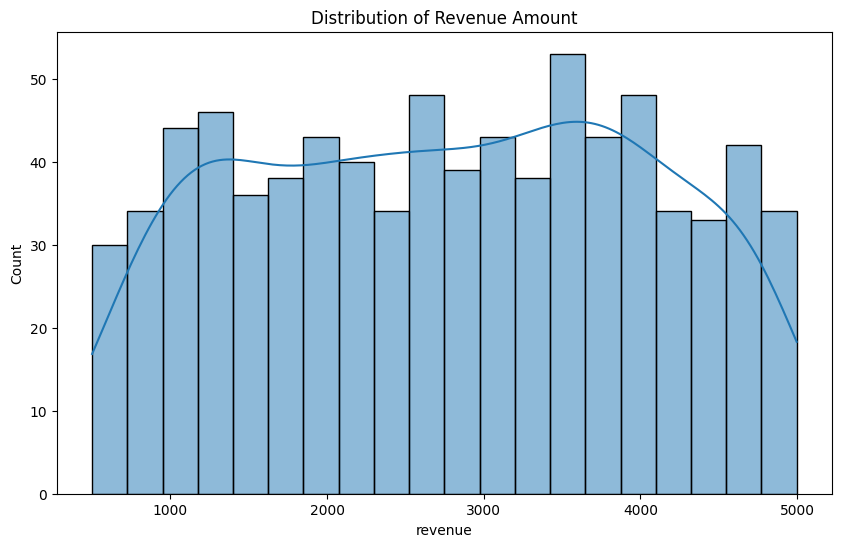

In [17]:
#Visualizing the distribution of Revenue in the data:

plt.figure(figsize=(10,6))

sns.histplot(data = df,
             x = df['revenue'],
             bins = 20,
             kde= True)
plt.title('Distribution of Revenue Amount')
plt.show()

analyze the Acquisition cost of the customers based on different channels:

In [18]:
channel_cost = df.groupby('channel')['cost'].mean().reset_index()

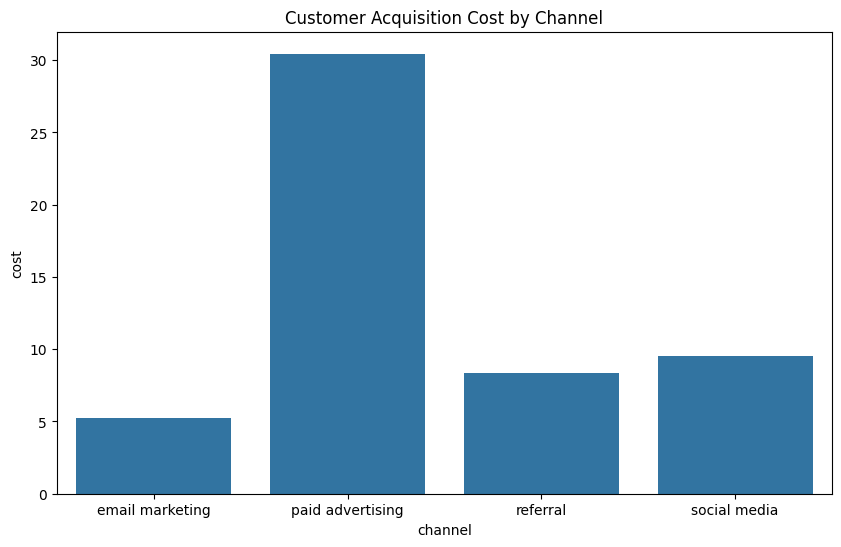

In [19]:
plt.figure(figsize=(10,6))

sns.barplot(data = channel_cost,
            x = 'channel',
            y = 'cost')

plt.title('Customer Acquisition Cost by Channel')
plt.show()

We can observe that the “Paid Advertising” channel has the highest cost here. So, if the consumers acquired through this channel have a high customer conversion rate and revenue, it is worth considering; otherwise, we must optimize our acquisition cost plan. In addition, among the channels, email marketing has the lowest acquisition cost. So, after weighing the expenses of the various channels, it is the best alternative. Finally, compared to paid advertising, referral and social media are much less expensive. As a result, it is advantageous in terms of cost acquisitio

which channel has the best conversion rate:

In [20]:
channel_conversion_rate = df.groupby('channel')['conversion_rate'].mean().reset_index()


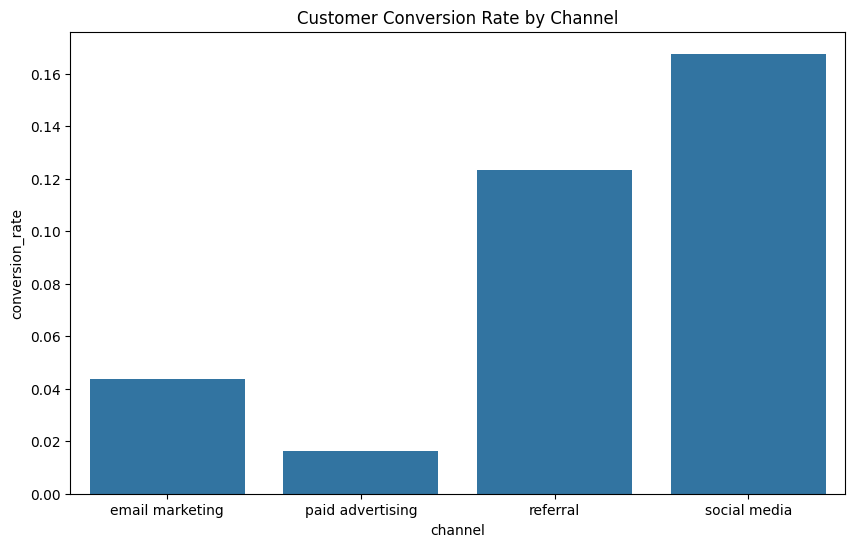

In [21]:
plt.figure(figsize=(10,6))

sns.barplot(data = channel_conversion_rate,
            x = 'channel',
            y = 'conversion_rate')

plt.title('Customer Conversion Rate by Channel')
plt.show()

In this bar graph, we can clearly see that the conversion rate of consumers from social media and referral has the highest spot, while paid advertising is struggling with the lowest conversion rate. And email marketing is doing alright. As a result, we realized which channel we should prioritize in order to bring customers to the business.

 revenue generated for the business by different channels:

In [22]:
channel_revenue = df.groupby('channel')['revenue'].sum().reset_index()

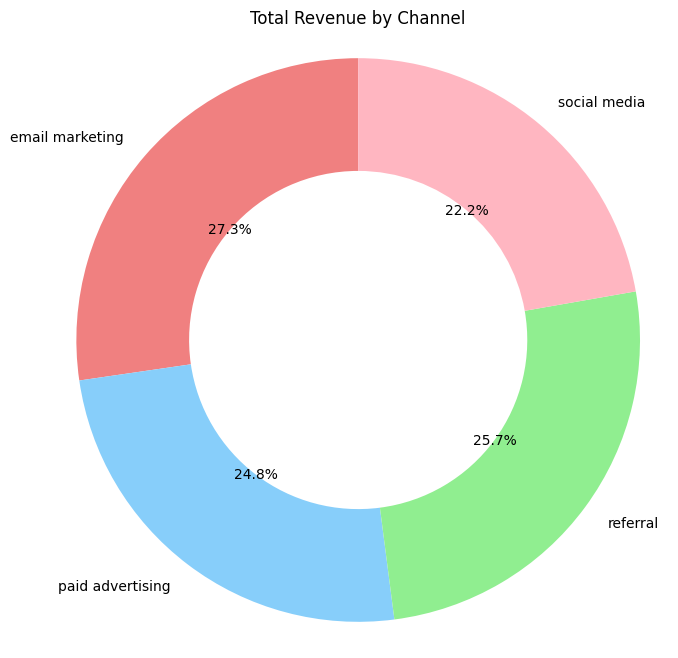

In [25]:
values = channel_revenue['revenue']
labels = channel_revenue['channel']

colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
plt.figure(figsize=(8,8))
plt.pie(values, labels= labels, autopct= '%1.1f%%', startangle= 90,
        colors= colors, wedgeprops= dict(width = 0.4))

plt.title('Total Revenue by Channel')
plt.axis('equal')

plt.show()

According to this pie graph, each channel makes almost the same amount of revenue. As a result, we cannot determine which channel is less profitable. However, it appears that email marketing is the most profitable channel, slightly more so than the others.

let’s analyze the ROI of each channel. It will assist in the development of strategies for increasing revenues or profits and customer retention.

In [27]:
#Calculating ROI(Return on Investment)
df['roi'] = (df['revenue'] - df['cost']) / df['cost']

channel_roi = df.groupby('channel')['roi'].mean().reset_index()


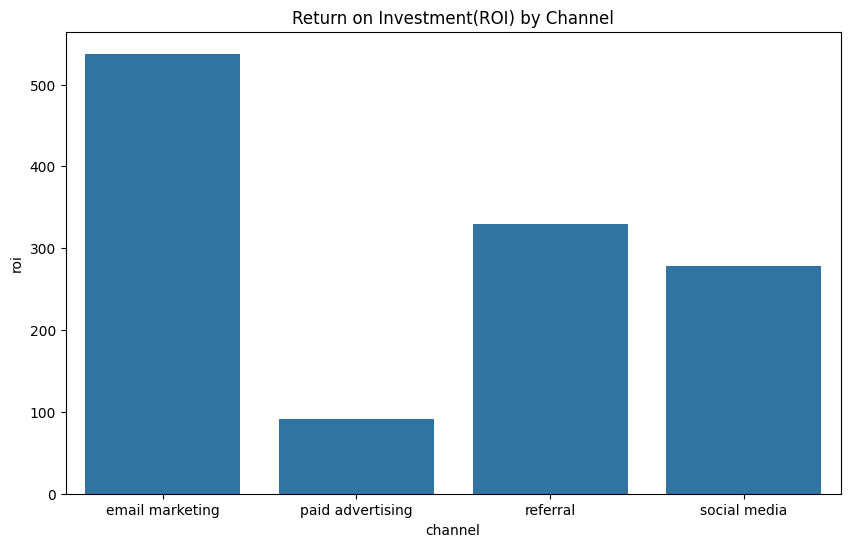

In [28]:
plt.figure(figsize=(10,6))

sns.barplot(data = channel_roi,
            x = 'channel',
            y = 'roi')

plt.title('Return on Investment(ROI) by Channel')
plt.show()

the ROI of email marketing seems promising, but paid advertising, despite its high cost, struggles to show a solid ROI.

In this way, we have to collect insights of each channels before calculating the “CLTV”. Finally, Let’s start calculating “CLTV”:

Calculating Customer Lifetime Value(CLVI):
In this task, the formula for CLVI is:

CLVI = (revenue — cost) * conversion_rate/ cost

In [29]:
#Calculating CLVI(Customer Lifetime Value)
df['cltv'] = (df['revenue'] - df['cost']) * df['conversion_rate'] / df['cost']

channel_cltv = df.groupby('channel')['cltv'].mean().reset_index()

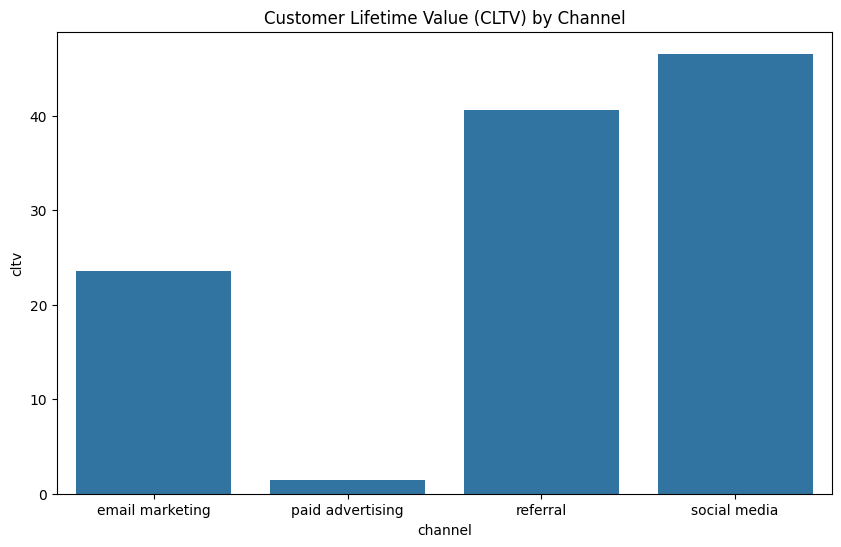

In [30]:
plt.figure(figsize=(10,6))

sns.barplot(data = channel_cltv,
            x = 'channel',
            y = 'cltv')

plt.title('Customer Lifetime Value (CLTV) by Channel')
plt.show()

Finally, customer lifetime value via social media and referral is the greatest, and paid advertising struggles here as well. So, after analysing all of the information, we may build the tactics for the business in this manner.


Lastly, let’s compare the CLTV distributions of social media and referral channels:

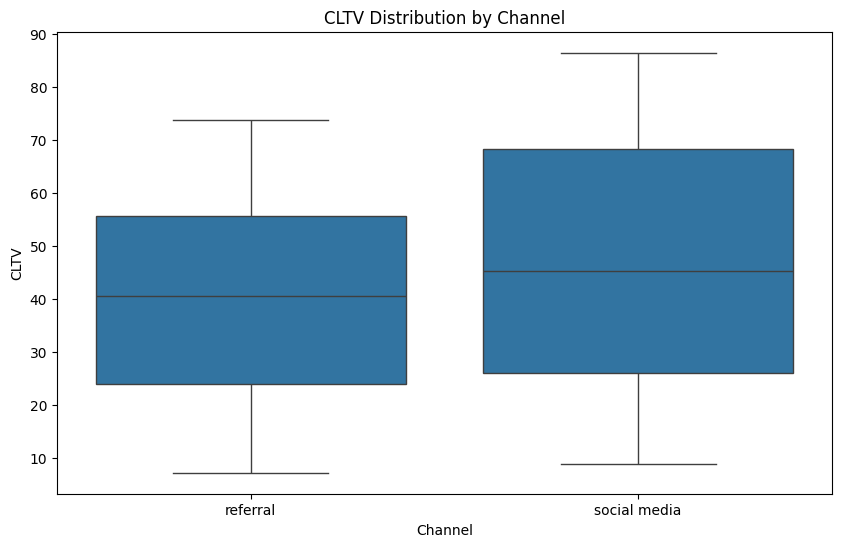

In [31]:
subset = df.loc[df['channel'].isin(['social media', 'referral'])]

plt.figure(figsize=(10,6))
sns.boxplot(data = subset,
            x = 'channel',
            y = 'cltv'
            )

plt.title('CLTV Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')

plt.show()

In conclusion, Customer Lifetime Value (CLV) is the compass that directs businesses towards long-term success. It quantifies the value of client connections, allowing businesses to better manage resources, customize marketing tactics, and maximize profits. Python is used to unlock CLV’s potential by enabling data-driven choices and forecasts. Businesses may succeed in an era where customer-centric strategies are crucial by leveraging the insights obtained by CLV research, assuring sustainable growth and a brighter future.